In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Pre-Processing

In [123]:
#importing the excel  file
filename = "Lab5_ONERAM6.csv"
raw_data = pd.read_csv(filename)

#breaking the data into each test (10 tests, 21 points per test)
SideForce_values = np.zeros((10,21))
PitchingMoment_values = np.zeros((10,21))
NormalForce_values = np.zeros((10,21))
YawingMoment_values = np.zeros((10,21))
RollingMoment_values = np.zeros((10,21))
AxialForce_values = np.zeros((10,21))
DynamicPressure_values = np.zeros((10,21))
StaticPressure_values = np.zeros((10,21))
AirSpeed_values = np.zeros((10,21))

i = -1
while i < 9:
    i = i + 1
    SideForce_values[i,:] = raw_data.iloc[i*21:i*21+21, 1]
    PitchingMoment_values[i,:] = raw_data.iloc[i*21:i*21+21, 2]
    NormalForce_values[i,:] = raw_data.iloc[i*21:i*21+21, 3]
    YawingMoment_values[i,:] = raw_data.iloc[i*21:i*21+21, 4]
    RollingMoment_values[i,:] = raw_data.iloc[i*21:i*21+21, 5]
    AxialForce_values[i,:] = raw_data.iloc[i*21:i*21+21, 6]
    DynamicPressure_values[i,:] = raw_data.iloc[i*21:i*21+21, 7]
    StaticPressure_values[i,:] = raw_data.iloc[i*21:i*21+21, 8]
    AirSpeed_values[i,:] = raw_data.iloc[i*21:i*21+21, 9]

#taking the average of the recorded data for each case
SideForce = []
PitchingMoment = []
NormalForce = []
YawingMoment = []
RollingMoment = []
AxialForce = []
DynamicPressure = []
StaticPressure = []
AirSpeed = []

for i in range(len(SideForce_values)):
    SideForce.append(np.mean(SideForce_values[i]))
    PitchingMoment.append(np.mean(PitchingMoment_values[i]))
    NormalForce.append(np.mean(NormalForce_values[i]))
    YawingMoment.append(np.mean(YawingMoment_values[i]))
    RollingMoment.append(np.mean(RollingMoment_values[i]))
    AxialForce.append(np.mean(AxialForce_values[i]))
    DynamicPressure.append(np.mean(DynamicPressure_values[i]))
    StaticPressure.append(np.mean(StaticPressure_values[i]))
    AirSpeed.append(np.mean(AirSpeed_values[i]))

#adjusting the signs according to the force balance to match the directions specified
for i in range(len(SideForce)):
    SideForce[i] = SideForce[i]*-1
    NormalForce[i] = NormalForce[i]*-1
    PitchingMoment[i] = PitchingMoment[i]*-1

#converting the static pressure from gauge to absolute pressure (addition of the atmospheric pressure)
P_atm = 29.46/2.036 #converting the measured atmospheric pressure to psi
for i in range(len(StaticPressure)):
    P_s = StaticPressure[i] + P_atm
    StaticPressure[i] = P_s

#converting the dynamic pressure from differential pressure to absolute pressure
for i in range(len(DynamicPressure)):
    q = DynamicPressure[i] + StaticPressure[i]
    DynamicPressure[i] = q

#calculating the densities for each case (rho = p/(R_spec*T))
R_spec = 53.35 #ft*lbf/lb*R
rho = []

TestNotes = pd.read_excel("Test Notes.xlsx")
Temperature = TestNotes.iloc[:,1]+459.67 #converting to Rankine

for i in range(len(StaticPressure)):
    rho_v = (2083.5938+(StaticPressure[i]*144))/(R_spec*Temperature.loc[i]) #lbm/ft^3
    rho.append(rho_v)

# Parasitic Drag

          Re_Mac        Re_Fus  Axial Force (lbf)  Normal Force (lbf)  \
0  196855.244059  4.970595e+05           0.026714           -0.010032   
1  389638.092038  9.838362e+05           0.082782            0.004915   
2  587050.138783  1.482302e+06           0.157915            0.026954   
3  785222.413741  1.982687e+06           0.253616            0.028773   
4  972020.108120  2.454351e+06           0.372808            0.064030   

   Side Force (lbf)      C_D0       C_L       C_Y  
0          0.013875  0.000029 -0.000011  0.000016  
1         -0.018787  0.000089  0.000006 -0.000021  
2         -0.065271  0.000169  0.000031 -0.000074  
3         -0.087590  0.000268  0.000032 -0.000098  
4         -0.167971  0.000390  0.000071 -0.000186  
[0.026713904761904758, 0.08278171428571429, 0.15791509523809524, 0.253616380952381, 0.37280828571428576, -0.005228666666666666, -0.16728933333333335, -0.2746381428571429, -0.16709009523809526, -0.06396961904761905]
[14.478557657404808, 14.5356314669

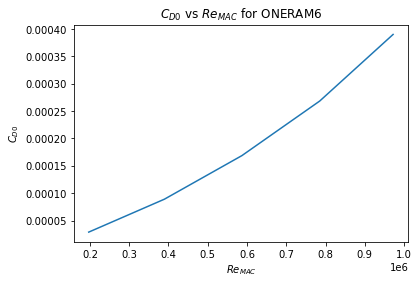

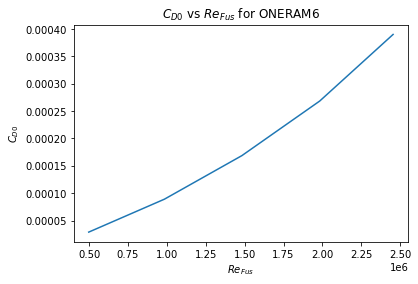

In [124]:
#Calculating the Reynolds Number
#constants
mu = 0.3841E-6*32.174 #lbm/ft*s
MAC = 4/12 #ft
Fus = 10.1/12 #ft
S_ref = 64 #wing surface area (both wings)

#value lists
Re_Mac_vals = []
Re_Fus_vals = []
CD_0_vals = []
C_L_vals = []
C_Y_vals = []

for i in range(5): #Re for the first 5 cases (0 AoA)
    Re_MAC = (rho[i]*AirSpeed[i]*MAC)/mu
    Re_FUS = (rho[i]*AirSpeed[i]*Fus)/mu

    Re_Mac_vals.append(Re_MAC)
    Re_Fus_vals.append(Re_FUS)

# #Calculating the parasitic drag coefficient
# for i in range(5):
#     D = AxialForce[i]*np.cos(0) + NormalForce[i]*np.sin(0)
#     CD_0 = D/(DynamicPressure[i]*S_ref)
#     CD_0_vals.append(CD_0)

#Calculating CL and CY with respect to aircraft body
r_body = 1.75/2 #in
h_body = 10.1 #in
S_body_ref = 2*np.pi*r_body*h_body + 2*np.pi*r_body**2 #in^2

for i in range(5):
    L = NormalForce[i]*np.cos(0) - AxialForce[i]*np.sin(0)
    C_L = L/(DynamicPressure[i]*S_body_ref)
    C_L_vals.append(C_L)

    Y = SideForce[i]
    C_Y = Y/(DynamicPressure[i]*S_body_ref)
    C_Y_vals.append(C_Y)

#Calculating the parasitic drag coefficient
for i in range(5):
    D = AxialForce[i]*np.cos(0) + NormalForce[i]*np.sin(0)
    C_D = D/(DynamicPressure[i]*S_ref)
    C_D0 = C_D - (C_L_vals[i]**2/(np.pi * 0.8 * 2.0)) #assuming oswald efficiency factor is 0.8
    CD_0_vals.append(C_D0)

d = {'Re_Mac': Re_Mac_vals,'Re_Fus': Re_Fus_vals, 'Axial Force (lbf)': AxialForce[0:5], 'Normal Force (lbf)': NormalForce[0:5], 'Side Force (lbf)': SideForce[0:5], 'C_D0': CD_0_vals, 'C_L': C_L_vals, 'C_Y': C_Y_vals}
Q2_df = pd.DataFrame(data=d)
print(Q2_df)
Q2_df.to_excel('Q2_PartC_Table_ONERAM6.xlsx')

#calculating dynamic pressure as a sanity check
# q = []
# for i in range(len(rho)):
#     q_val = (.5 * rho[i] * AirSpeed[i]**2)/144
#     q.append(q_val)

print(AxialForce)
print(DynamicPressure)

plt.plot(Re_Mac_vals, CD_0_vals)
plt.xlabel(r"$Re_{MAC}$")
plt.ylabel(r"$C_{D0}$")
plt.title(r"$C_{D0}$" + " vs " r"$Re_{MAC}$" + " for ONERAM6")
plt.show()

plt.plot(Re_Fus_vals, CD_0_vals)
plt.xlabel(r"$Re_{Fus}$")
plt.ylabel(r"$C_{D0}$")
plt.title(r"$C_{D0}$" + " vs " r"$Re_{Fus}$" + " for ONERAM6")
plt.show()




# Lift, Drag and Pitching Moment

   AoA (rad)  Axial Force (lbf)  Normal Force (lbf)  Pitching Moment (lbf-in)  \
0   0.000000           0.157915            0.026954                 -0.237449   
1   0.074176          -0.005229            2.523328                 -2.087420   
2   0.106465          -0.167289            3.378530                 -3.051165   
3   0.143117          -0.274638            4.369207                 -3.787720   
4   0.177151          -0.167090            5.329917                 -4.832730   
5   0.205076          -0.063970            5.683974                 -5.066452   

        C_L       C_D       C_m  
0  0.000031  0.000169 -0.000063  
1  0.002688  0.000194 -0.000557  
2  0.003607  0.000206 -0.000815  
3  0.004661  0.000375 -0.001011  
4  0.005635  0.000827 -0.001290  
5  0.005959  0.001170 -0.001353  


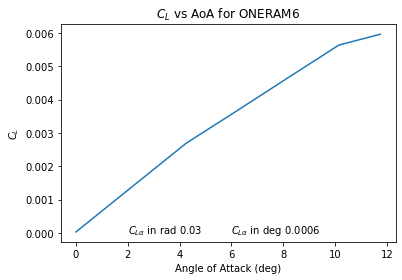

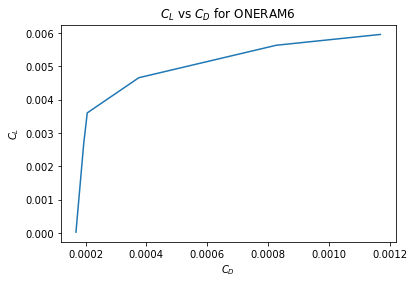

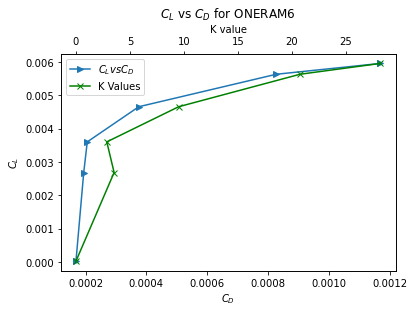

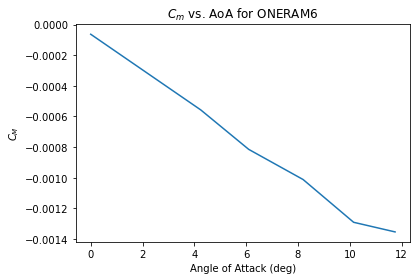

C_M_alpha for ONERAM6
[-0.00011622858132336779, -0.00013905388931995433, -9.372725745977437e-05, -0.0001430401790655014, -3.925019085036829e-05]


In [125]:
#Calculating the C_L and C_D for each AoA
AoA = TestNotes.iloc[5:11, 3]*(np.pi/180) #AoA in radians
C_L_AoA = [C_L_vals[2]]
C_D_AoA = [CD_0_vals[2]]
C_M_AoA = [PitchingMoment[2]/(DynamicPressure[2]*S_ref*MAC*12)]
AoA_val = [0]
AF_val = [AxialForce[2]]
NF_val = [NormalForce[2]]
PM_val = [PitchingMoment[2]]

for i in range(len(AoA)):
    L = NormalForce[i+5]*np.cos(AoA.iloc[i]) - AxialForce[i+5]*np.sin(AoA.iloc[i])
    C_L = L/(DynamicPressure[i+5]*(S_ref))
    C_L_AoA.append(C_L)

    D = AxialForce[i+5]*np.cos(AoA.iloc[i]) + NormalForce[i+5]*np.sin(AoA.iloc[i])
    C_D = D/(DynamicPressure[i+5]*(S_ref))
    C_D_AoA.append(C_D)

    C_M = PitchingMoment[i+5]/(DynamicPressure[i+5]*S_ref*MAC*12)
    C_M_AoA.append(C_M)

    AoA_val.append(AoA.iloc[i])
    AF_val.append(AxialForce[i+5])
    NF_val.append(NormalForce[i+5])
    PM_val.append(PitchingMoment[i+5])

#creating the data table for part 3b
d = {'AoA (rad)': AoA_val, 'Axial Force (lbf)': AF_val, 'Normal Force (lbf)': NF_val, 'Pitching Moment (lbf-in)': PM_val, 'C_L': C_L_AoA, 'C_D': C_D_AoA, 'C_m': C_M_AoA}
Q3b_df = pd.DataFrame(data=d)
print(Q3b_df)
Q3b_df.to_excel("Q3_PartB_Table_ONERAM6.xlsx")

#part 3c
AoA_val_deg = []
for i in range(len(AoA_val)):
    AoA_deg = AoA_val[i]*180/np.pi
    AoA_val_deg.append(AoA_deg)

#finding the C_Lalpha for the linear part
#for the degrees section
C_Lalpha_deg = (C_L_AoA[4]-C_L_AoA[0])/(AoA_val_deg[4]-AoA_val_deg[0])
C_Lalpha_rad = (C_L_AoA[4]-C_L_AoA[0])/(AoA_val[4]-AoA_val[0])

plt.plot(AoA_val_deg, C_L_AoA)
plt.ylabel(r'$C_L$')
plt.xlabel("Angle of Attack (deg)")
plt.text(2, 0, r'$C_{L\alpha}$' + " in rad {:.2f}".format(C_Lalpha_rad))
plt.text(6, 0, r'$C_{L\alpha}$' + " in deg {:.4f}".format(C_Lalpha_deg))
plt.title(r'$C_L$' + " vs AoA for ONERAM6")
plt.show()

#part 3d
plt.plot(C_D_AoA, C_L_AoA)
plt.xlabel(r'$C_D$')
plt.ylabel(r'$C_L$')
plt.title(r'$C_L$' + " vs " + r'$C_D$' + " for ONERAM6")
plt.show()

#Estimating the the drag due to the lift factor K
K = []
for i in range(len(C_L_AoA)):
    K_val = (C_D_AoA[i] - CD_0_vals[2])/C_L_AoA[i]**2
    K.append(K_val)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
line1, = ax1.plot(C_D_AoA, C_L_AoA, '->', label=r"$C_L vs C_D$")
ax1.set_xlabel(r'$C_D$')
ax1.set_ylabel(r'$C_L$')
ax1.set_title(r'$C_L$' + " vs " + r'$C_D$' + " for ONERAM6")
line2, = ax2.plot(K, C_L_AoA, '-gx', label="K Values")
ax2.set_xlabel("K value")
plt.legend(handles=[line1, line2])
plt.show()

#Plotting C_M vs AoA
#finding the C_Malpha
C_M_alpha = []
for i in range(len(C_M_AoA)-1):
    C_Ma = (C_M_AoA[i+1] - C_M_AoA[i]) / (AoA_val_deg[i+1] - AoA_val_deg[i])
    C_M_alpha.append(C_Ma)

plt.plot(AoA_val_deg, C_M_AoA)
plt.ylabel(r'$C_M$')
plt.xlabel("Angle of Attack (deg)")
plt.title(r'$C_m$' + " vs. AoA for ONERAM6")
plt.show()

print('C_M_alpha' + " for ONERAM6")
print(C_M_alpha)
d = {"C_M_alpha": C_M_alpha}
C_M_alpha_df = pd.DataFrame(data=d)
C_M_alpha_df.to_excel("C_M_alpha Values ONERAM6.xlsx")